#Linear Regression

Linear regression models the relationship between a dependent variable $y$ and one or more independent variables $x$ using a linear equation.

## Simple Linear Regression

For simple linear regression:

$y = \beta_0 + \beta_1x + \epsilon$

Where:
- $y$ is the dependent variable
- $x$ is the independent variable
- $\beta_0$ is the y-intercept
- $\beta_1$ is the slope
- $\epsilon$ is the error term

In matrix notation, we can express the linear regression model as:

$$ \mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon} $$

Where:
- $\mathbf{y}$ is an $n \times 1$ vector of dependent variables
- $\mathbf{X}$ is an $n \times (p+1)$ matrix of independent variables (including a column of 1s for the intercept)
- $\boldsymbol{\beta}$ is a $(p+1) \times 1$ vector of coefficients
- $\boldsymbol{\epsilon}$ is an $n \times 1$ vector of error terms

##Mean Squared Error (MSE)
MSE measures the average squared difference between predicted and actual values:
$$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 $$
Where:

* $n$ is the number of observations
* $y_i$ is the actual value
* $\hat{y}_i$ is the predicted value

## Least Squares Estimation

The goal is to find $\boldsymbol{\beta}$ that minimizes the sum of squared residuals:

$$ S(\boldsymbol{\beta}) = (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta}) $$

## Derivation

1. Expand the equation:

   $$ S(\boldsymbol{\beta}) = \mathbf{y}^T\mathbf{y} - \mathbf{y}^T\mathbf{X}\boldsymbol{\beta} - \boldsymbol{\beta}^T\mathbf{X}^T\mathbf{y} + \boldsymbol{\beta}^T\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} $$

2. Take the derivative with respect to $\boldsymbol{\beta}$:

   $$ \frac{\partial S}{\partial \boldsymbol{\beta}} = -2\mathbf{X}^T\mathbf{y} + 2\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} $$

3. Set the derivative to zero and solve:

   $$ -2\mathbf{X}^T\mathbf{y} + 2\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} = 0 $$
   $$ \mathbf{X}^T\mathbf{X}\boldsymbol{\beta} = \mathbf{X}^T\mathbf{y} $$

4. The least squares estimator is:

   $$ \hat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} $$

## Properties

1. The fitted values are:
   
   $$ \hat{\mathbf{y}} = \mathbf{X}\hat{\boldsymbol{\beta}} = \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} $$

2. The residuals are:
   
   $$ \mathbf{e} = \mathbf{y} - \hat{\mathbf{y}} = (\mathbf{I} - \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T)\mathbf{y} $$

3. The Mean Squared Error (MSE) is:

   $$ MSE = \frac{1}{n}\mathbf{e}^T\mathbf{e} = \frac{1}{n}(\mathbf{y} - \mathbf{X}\hat{\boldsymbol{\beta}})^T(\mathbf{y} - \mathbf{X}\hat{\boldsymbol{\beta}}) $$





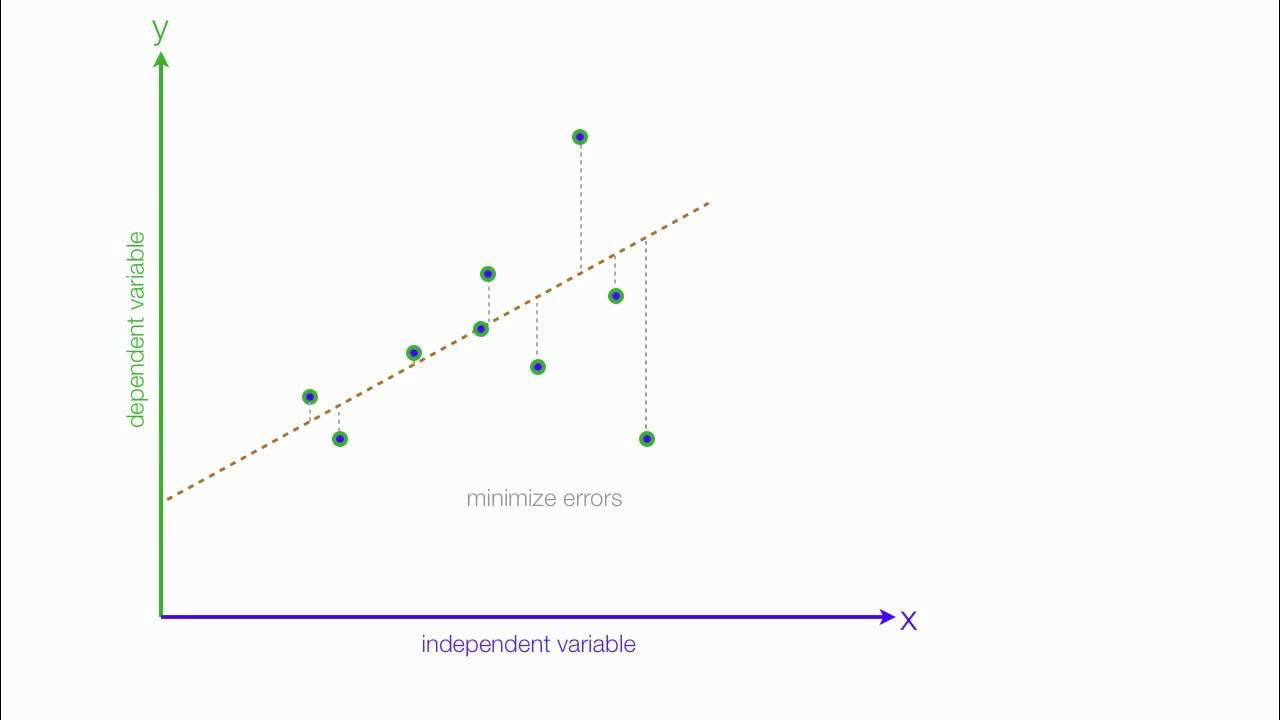

## Using sklearn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

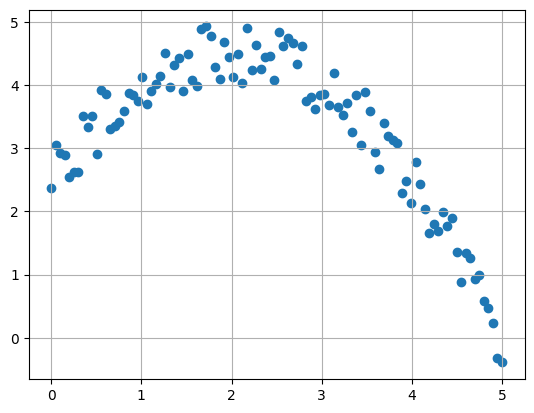

In [ ]:
#Let's generate some data with noise
np.random.seed(42)
x=np.linspace(0,5,100)
noise=1
y=2*x-0.5*x**2+2+noise*np.random.rand(len(x)) #noisy data
plt.scatter(x,y)
plt.grid()

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
X = np.column_stack((x, x**2))
#X

In [ ]:
def plotpred(x,y,y_pred,model):
  plt.scatter(x,y)
  plt.scatter(x,y_pred)
  plt.grid()
  plt.title(mean_squared_error(y,y_pred))

coeff:  [ 2.01730882 -0.50264207]
intercept:  2.44903715017193


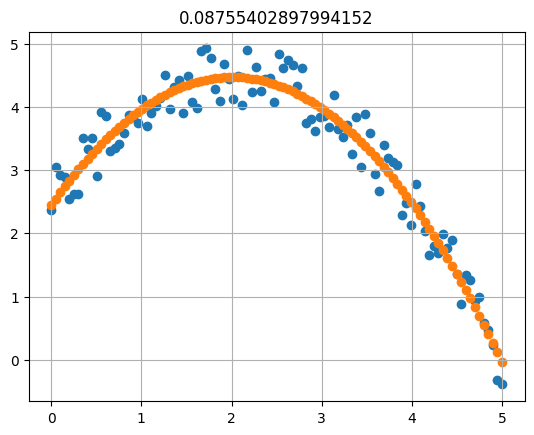

In [ ]:
model=LinearRegression().fit(X, y)
y_pred=model.predict(X)
plotpred(x,y,y_pred,model)
print('coeff: ',model.coef_)
print('intercept: ',model.intercept_)

In [ ]:
model.coef_

array([ 2.01730882, -0.50264207])

In [ ]:
model.intercept_

2.44903715017193

## Functional Form
So, maybe you want to pass in ass many parameters as you want. But, complicated does not always mean more is better!

coeff:  [-0.22898632  0.94266018 -0.1875618   1.29027739  0.80798101]
intercept:  1.8516809916627313


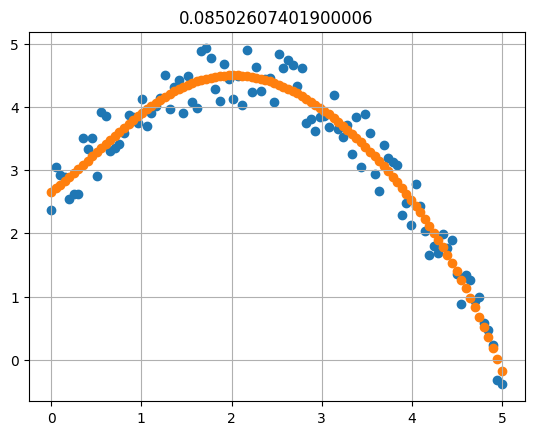

In [ ]:
X = np.column_stack((x, x**2,x**3,np.sin(x),np.cos(x)))
model=LinearRegression().fit(X, y)
y_pred=model.predict(X)
plotpred(X[:,0],y,y_pred,model)
print('coeff: ',model.coef_)
print('intercept: ',model.intercept_)
#Complicated is not always better! But why? it seems like the more complicated I make the model, the lower MSE?

##Test vs Training data

In reality, we train the model on only training data, but, we test it on test data. This ensures that I do not overfit as explained [here](https://www.geeksforgeeks.org/machine-learning/ml-bias-variance-trade-off/). In reality, some types of models do not suffer from this issue (that is a little too advanced for this class). But it is generally a good idea to split your data and evaluate performance on a test set.

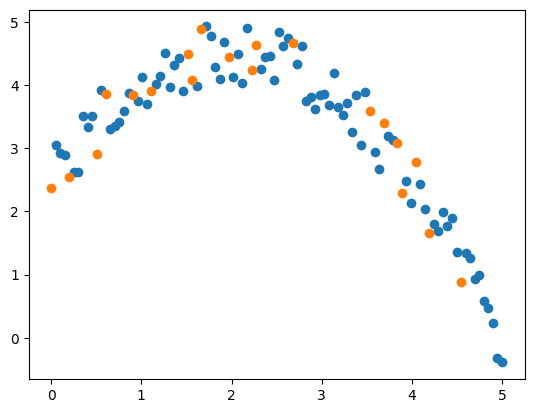

In [ ]:
X = np.column_stack((x, x**2,x**3,np.sin(x),np.cos(x)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X_train[:,0],y_train)
plt.scatter(X_test[:,0],y_test)

coeff:  [-2.10667359  2.0850389  -0.33163429  2.33499981  1.41233677]
intercept:  1.4971291149358645


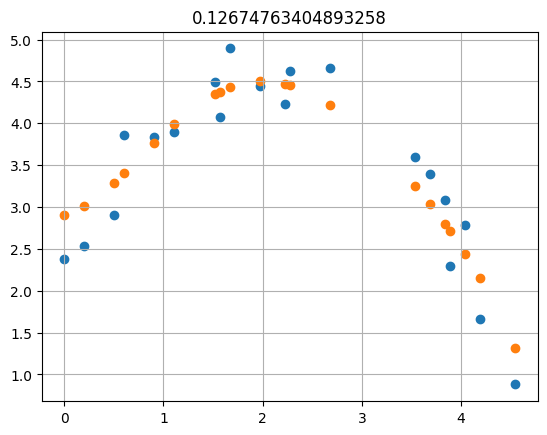

In [ ]:
X = np.column_stack((x, x**2,x**3,np.sin(x),np.cos(x)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=LinearRegression().fit(X_train, y_train)
y_pred=model.predict(X_test)
plotpred(X_test[:,0],y_test,y_pred,model)
print('coeff: ',model.coef_)
print('intercept: ',model.intercept_)

coeff:  [ 1.93875133 -0.48823768]
intercept:  2.5228079482993846


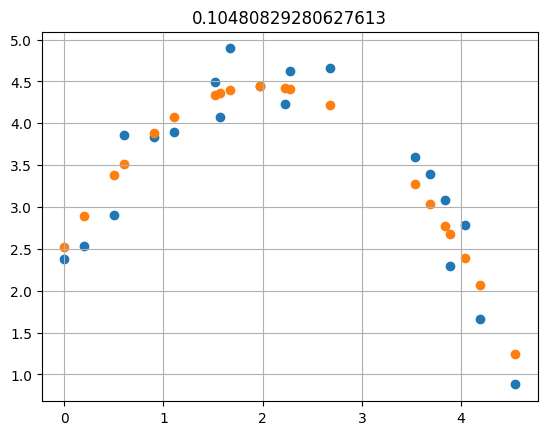

In [ ]:
#Simple model did better on the test set!!! So, we need to care about test set!
X = np.column_stack((x, x**2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=LinearRegression().fit(X_train, y_train)
y_pred=model.predict(X_test)
plotpred(X_test[:,0],y_test,y_pred,model) #See, this model did better on the test set!
print('coeff: ',model.coef_)
print('intercept: ',model.intercept_)

## Importance
If all parameters have the same scale, importance can be deducted from coefficient


coeff:  [ 2.8267469  -3.74740188]
intercept:  3.2466224368025665


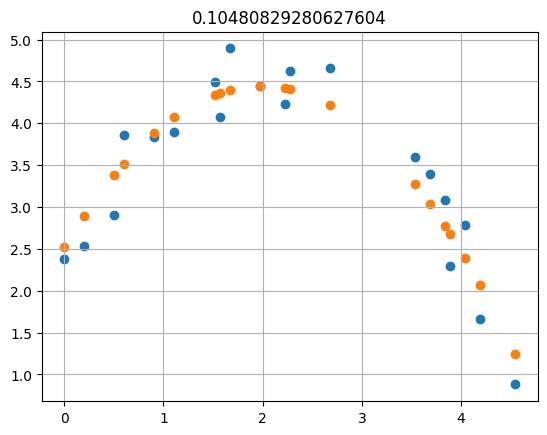

In [ ]:
#Simple model did better on the test set!!! So, we need to care about test set!
X = np.column_stack((x, x**2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply StandardScaler for scaling
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model=LinearRegression().fit(X_train_scaled, y_train)
y_pred=model.predict(X_test_scaled)
plotpred(X_test[:,0],y_test,y_pred,model) #x^2 is more important for prediction than X!
print('coeff: ',model.coef_)
print('intercept: ',model.intercept_)

## Predicted vs actual plot
Usually, we also care about the predicted vs actual plot

In [ ]:
def plot_pred_vs_actual(y, y_pred):
    # Calculate Mean Squared Error
    mse = mean_squared_error(y, y_pred)
    # Create the plot
    plt.figure(figsize=(6, 6))  # Square plot
    plt.scatter(y, y_pred, alpha=0.7, edgecolor='k', label='Predicted vs Actual')
    plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='Perfect Fit Line')  # 45-degree line
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Predicted vs Actual (MSE: {mse:.4f})')
    plt.grid(True)
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')  # Ensure square aspect ratio
    plt.show()

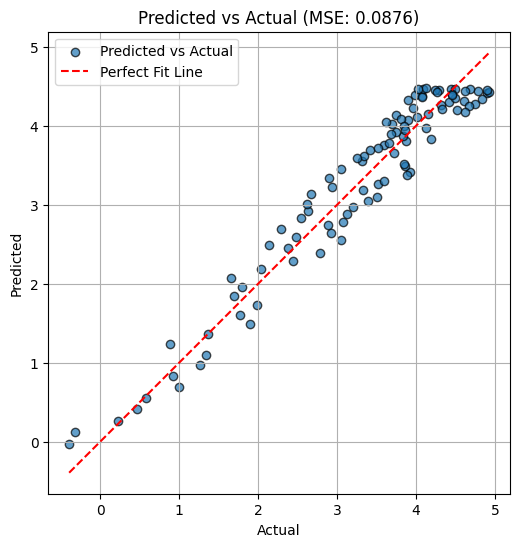

In [ ]:
model=LinearRegression().fit(X, y)
y_pred=model.predict(X)
plot_pred_vs_actual(y, y_pred)


##Actual Datasets

In [ ]:
#Remember you can load data to Colab?
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
data=sns.load_dataset('mpg')
data.head()
data=data.dropna()
y=data['mpg']
X=data.iloc[:,1:7]
X

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82
394,4,97.0,52.0,2130,24.6,82
395,4,135.0,84.0,2295,11.6,82
396,4,120.0,79.0,2625,18.6,82


Rest is up to you! Fit a model and show predicted vs actual. Also, tell me the importance.

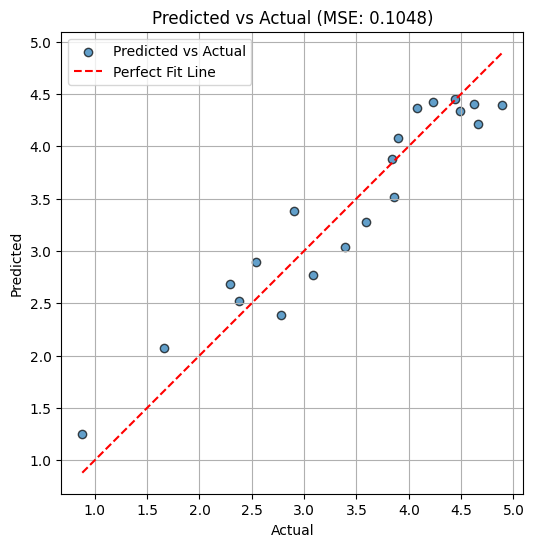

array([ 2.8267469 , -3.74740188])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply StandardScaler for scaling
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model=LinearRegression().fit(X_train_scaled, y_train)
y_pred=model.predict(X_test_scaled)
plot_pred_vs_actual(y_test, y_pred)
model.coef_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Logistic Regression

What if I want to predict a class and not a number. For example Cat or Dog. Safe or not safe etc.

# Logistic Regression

Logistic regression models the probability of a binary outcome (dependent variable) based on one or more independent variables $x$ using the logistic function.

## Logistic Regression Model

For logistic regression, the model is represented as:

$$ \text{logit}(p) = \ln\left(\frac{p}{1 - p}\right) = \beta_0 + \beta_1x $$

Where:
- $p$ is the probability of the outcome being 1
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient of the independent variable $x$

Alternatively, the probability $p$ can be expressed using the logistic function:

$$ p = \frac{1}{1 + e^{-(\beta_0 + \beta_1x)}} $$

In matrix notation, the logistic regression model can be written as:

$$ \mathbf{p} = \frac{1}{1 + e^{-(\mathbf{X}\boldsymbol{\beta})}} $$

Where:
- $\mathbf{p}$ is an $n \times 1$ vector of probabilities
- $\mathbf{X}$ is an $n \times (p+1)$ matrix of independent variables (including a column of 1s for the intercept)
- $\boldsymbol{\beta}$ is a $(p+1) \times 1$ vector of coefficients

## Log-Likelihood Function

The logistic regression coefficients are estimated by maximizing the log-likelihood function:

$$ \ell(\boldsymbol{\beta}) = \sum_{i=1}^{n} \left[ y_i \ln(p_i) + (1 - y_i) \ln(1 - p_i) \right] $$

Where:
- $y_i$ is the actual outcome (0 or 1)
- $p_i$ is the predicted probability from the logistic model

## No Closed-Form Solution

Unlike linear regression, logistic regression does not have a closed-form solution for the parameters $\boldsymbol{\beta}$ due to the non-linearity introduced by the logistic function. This is because the log-likelihood function is not quadratic, making it impossible to solve for $\boldsymbol{\beta}$ by simple algebraic manipulation.

### Numerical Methods for Estimation

To estimate the coefficients, iterative numerical methods must be used, with common approaches being:

1. **Gradient Descent**: This method involves iteratively updating the coefficients by computing the gradient of the log-likelihood function and moving in the direction that maximizes the likelihood. For large datasets, **Stochastic Gradient Descent (SGD)**, which updates the parameters using small batches of data at each step, is often preferred for its computational efficiency.

2. **Newton-Raphson**: This method uses both the first and second derivatives of the log-likelihood function to iteratively update the coefficients. While it converges faster, it can be computationally intensive due to the calculation of the Hessian matrix (second derivative).

3. **Iteratively Reweighted Least Squares (IRLS)**: This is a common method for solving logistic regression, where the weights are updated at each iteration based on the current estimates of the probabilities.



# Evaluation

When evaluating a classification model, the following metrics are commonly used. They are derived from the confusion matrix, which includes:

| **Metric**   | **Description**                                              |
|--------------|--------------------------------------------------------------|
| **TP (True Positive)**  | Correctly predicted positive instances.            |
| **TN (True Negative)**  | Correctly predicted negative instances.            |
| **FP (False Positive)** | Incorrectly predicted positive instances.          |
| **FN (False Negative)** | Incorrectly predicted negative instances.          |

## Key Metrics

| **Metric**     | **Formula**                                              | **Description**                                                                                          |
|-----------------|----------------------------------------------------------|----------------------------------------------------------------------------------------------------------|
| **Accuracy**   | $\frac{TP + TN}{TP + TN + FP + FN}$                       | Proportion of correctly predicted instances out of all instances.                                        |
| **Precision**  | $\frac{TP}{TP + FP}$                                      | Proportion of positive predictions that are correct (positive predictive value).                         |
| **Recall**     | $\frac{TP}{TP + FN}$                                      | Proportion of actual positives that are correctly identified (sensitivity).                              |
| **F1-Score**   | $2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$ | Harmonic mean of precision and recall, balancing both metrics.                                           |

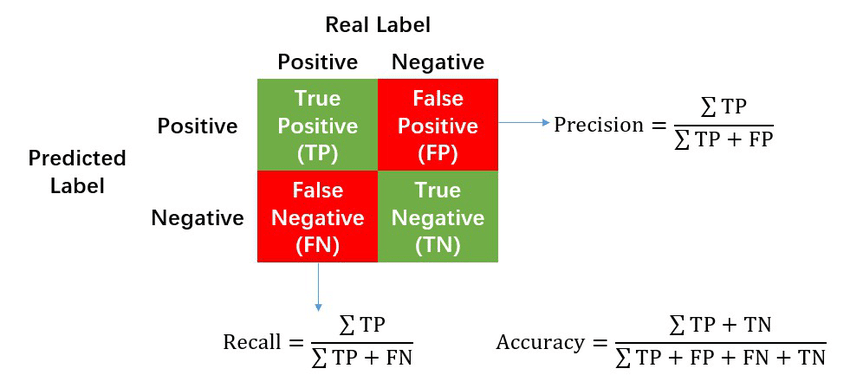

## Using sklearn

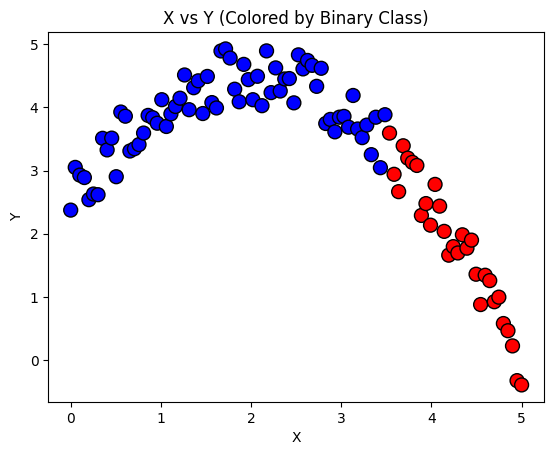

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set random seed
np.random.seed(42)

# Generate the dataset
x = np.linspace(0, 5, 100)
noise = 1
y = 2 * x - 0.5 * x ** 2 + 2 + noise * np.random.rand(len(x))  # Noisy data

# Convert y into binary classes
# Let's assume a threshold to convert this into a binary classification problem
y_binary = np.where(x > 3.5, 1, 0)

plt.scatter(x, y, c=y_binary, cmap='bwr', edgecolor='k', s=100)
plt.title('X vs Y (Colored by Binary Class)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Accuracy: 0.95
Confusion Matrix:
[[13  0]
 [ 1  6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



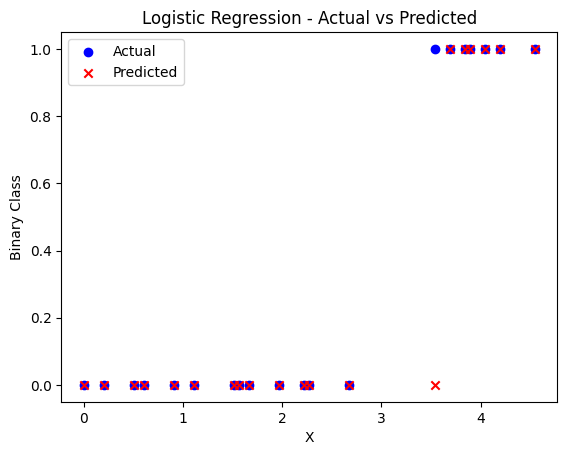

In [ ]:


# Reshape x to a 2D array
X = x.reshape(-1, 1)
#X = np.column_stack((x, x**2))
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Feature scaling for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot the decision boundary
plt.scatter(X_test[:,0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:,0], y_pred, color='red', marker='x', label='Predicted')
plt.title('Logistic Regression - Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('Binary Class')
plt.legend()
plt.show()


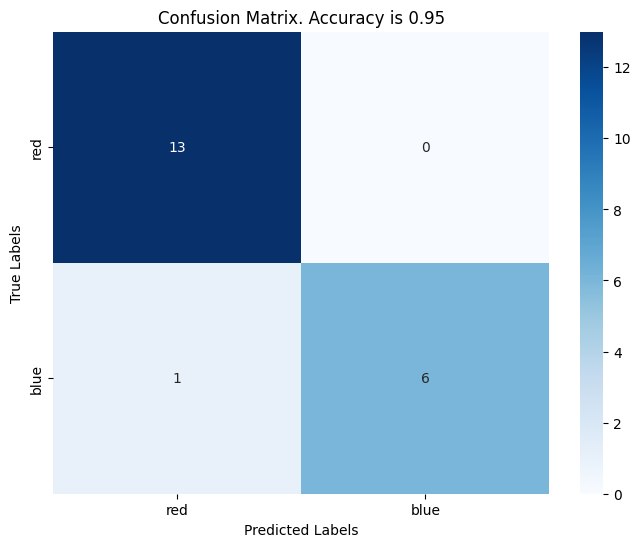

In [ ]:
# Generate the confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Define the labels for the classes
class_labels = ['red','blue']  # Adjust based on your column name for class labels

# Plot the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title(f"Confusion Matrix. Accuracy is {accuracy:.2f}")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

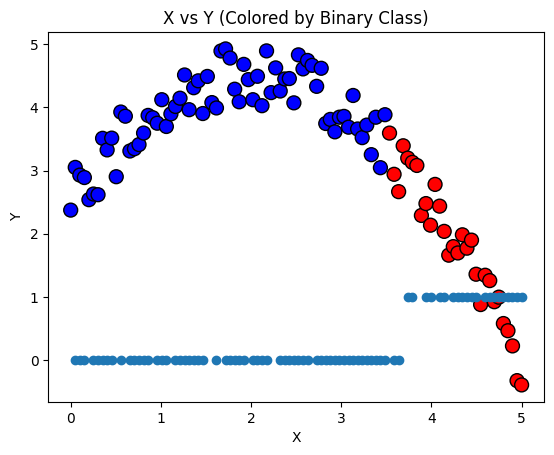

In [ ]:
plt.scatter(x, y, c=y_binary, cmap='bwr', edgecolor='k', s=100)
plt.scatter(X_train[:,0],log_reg.predict(X_train_scaled))
plt.title('X vs Y (Colored by Binary Class)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


##Actual datasets

In [ ]:
#You can also mount your google drive
from google.colab import drive
import os
import pandas as pd
import seaborn as sns
drive.mount('/content/drive')
#Now I can navigate where I saved these files!
os.chdir('/content/drive/MyDrive/CEE244_Programming')
#%cd /content/drive/MyDrive/Python #change the current directory (cd)
!ls

Mounted at /content/drive
Class_Organization		   P4_Modules.ipynb
functions			   P5_Plotting_Data_Analysis.ipynb
P00_Examples.ipynb		   P6_Linear_Algebra.ipynb
P10_GIS.ipynb			   P7_Symbolic_Numerical_Math.ipynb
P1_Python_Basics_Data_Types.ipynb  P8_Basic_ML.ipynb
P2_Flow_Controls.ipynb		   P9_Statistical_Simulations.ipynb
P3_Functions_and_Classes.ipynb


In [ ]:
iris=sns.load_dataset("iris") #pd.read_csv('Class_Organization/External_Files/datasets/iris.csv')
iris
#sns.load_dataset("iris")

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Splitting the dataset into the Training set and Test set
X = iris.iloc[:, [0,1,2, 3]].values
y = iris.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature scaling for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create a logistic regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test_scaled)

In [ ]:
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica'], dtype=object)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.97
Confusion Matrix:
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



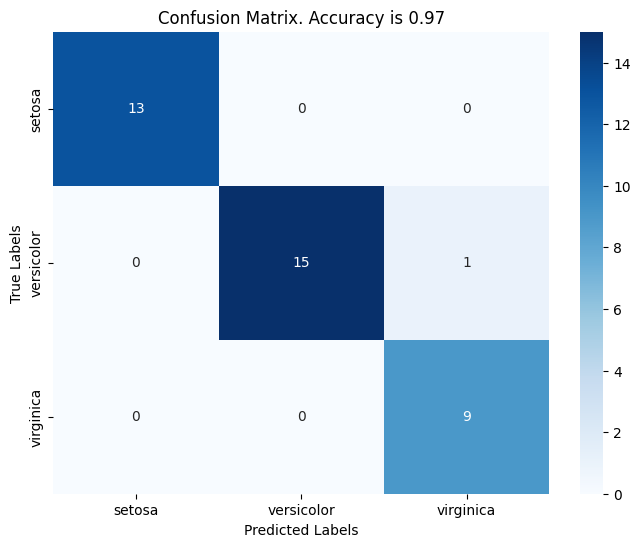

In [ ]:
# Generate the confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Define the labels for the classes
class_labels = iris['species'].unique()  # Adjust based on your column name for class labels

# Plot the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title(f"Confusion Matrix. Accuracy is {accuracy:.2f}")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


##MNIST

In [ ]:
mnist = pd.read_csv('/content/sample_data/mnist_train_small.csv')
mnist

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


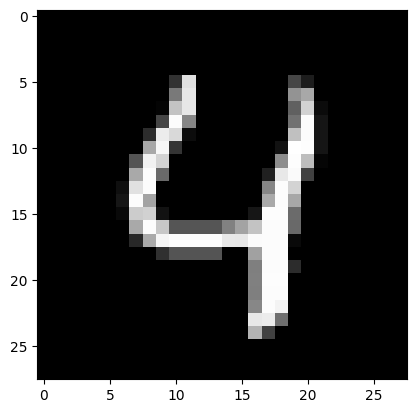

In [ ]:
index=3
pixels=mnist.iloc[index,1:].values.reshape(28, 28)
plt.imshow(pixels, cmap='gray')

In [ ]:
labels = mnist.iloc[:, 0]  # Extract the labels
pixels = mnist.iloc[:, 1:]  # Extract the pixel data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.2, random_state=42)
#No need to scale since everything is between 0 and 1

In [ ]:
# Create a logistic regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train) #notice how much longer this takes!

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.90
Confusion Matrix:
[[359   0   4   0   1   4   2   2   4   1]
 [  0 423   3   2   1   1   0   0   5   1]
 [  3   2 344   6   8   1   6   7  10   3]
 [  2   0  11 362   0  15   1   4   8   3]
 [  1   1   5   2 363   2   4   4   1  18]
 [  3   3   3  20   2 287   6   1  12   4]
 [  2   2  10   2   5   8 378   1   4   0]
 [  1   2   6   5   3   0   1 402   3  15]
 [  4  10  15  13   3  21   3   0 308   7]
 [  1   2   0   5  23   5   0  14   5 360]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       377
           1       0.95      0.97      0.96       436
           2       0.86      0.88      0.87       390
           3       0.87      0.89      0.88       406
           4       0.89      0.91      0.90       401
           5       0.83      0.84      0.84       341
           6       0.94      0.92      0.93       412
           7       0.92      0.92      0.92       438
           8       0.86   

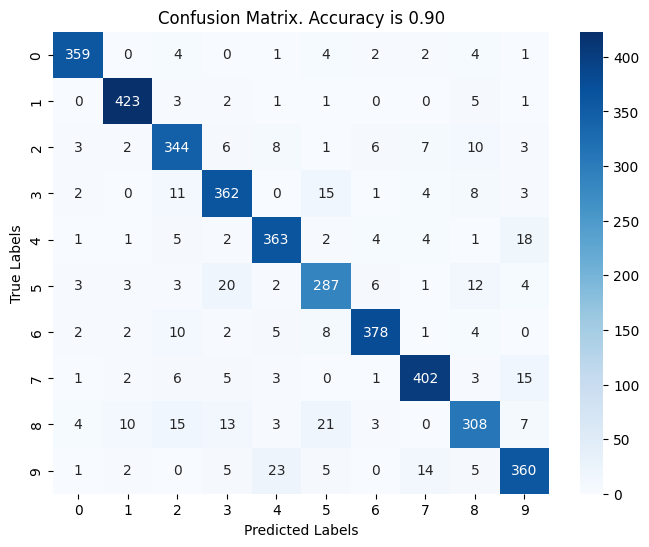

In [ ]:
# Define the labels for the classes
class_labels = np.arange(10)  # Adjust based on your column name for class labels

# Plot the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title(f"Confusion Matrix. Accuracy is {accuracy:.2f}")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([4])

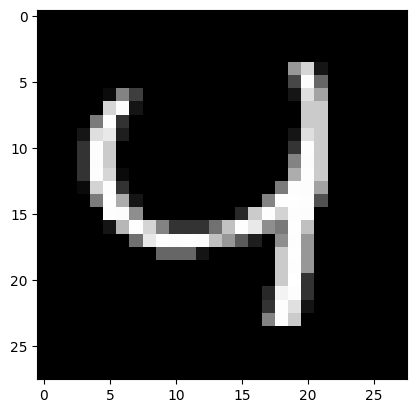

In [ ]:
index=20

pixels=mnist.iloc[index,1:].values.reshape(28, 28)
plt.imshow(pixels, cmap='gray')

prediction = log_reg.predict(mnist.iloc[index,1:].values.reshape(1,-1))
display(prediction)

#Neural Networks
# Neural Networks

Neural networks are computational models inspired by the human brain, consisting of layers of interconnected nodes (neurons) that process data through weighted connections to learn patterns.

## Structure of a Neural Network

1. **Input Layer**: Accepts input features.
2. **Hidden Layers**: Perform computations using activation functions.
3. **Output Layer**: Produces the final predictions or classifications.

Each neuron computes:

$$ z = \mathbf{w}^T\mathbf{x} + b $$

Where:
- $\mathbf{w}$ are weights
- $\mathbf{x}$ are input features
- $b$ is the bias
- $z$ is the linear combination output

The activation function applies non-linearity:

$$ a = f(z) $$

Common activation functions include:
- Sigmoid: $f(z) = \frac{1}{1 + e^{-z}}$
- ReLU: $f(z) = \max(0, z)$
- Tanh: $f(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$

## Feedforward Process

Information flows forward through the network:
1. Inputs are weighted and summed at each neuron.
2. Activation functions transform the summed input.
3. Outputs propagate to the next layer until the output layer.

## Cost Function

Neural networks optimize a cost function, such as Mean Squared Error for regression:

$$ J = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 $$

Or cross-entropy for classification:

$$ J = -\frac{1}{n} \sum_{i=1}^n \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] $$

## Backpropagation

Backpropagation adjusts weights and biases to minimize the cost function using the gradient descent algorithm:

1. Compute the gradient of the cost function with respect to weights and biases.
2. Update weights:

   $$ w = w - \eta \frac{\partial J}{\partial w} $$

   Where $\eta$ is the learning rate.

3. Repeat until convergence.

## Applications

Neural networks are used in:
- Image recognition
- Natural language processing
- Autonomous systems
- Predictive modeling


##Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

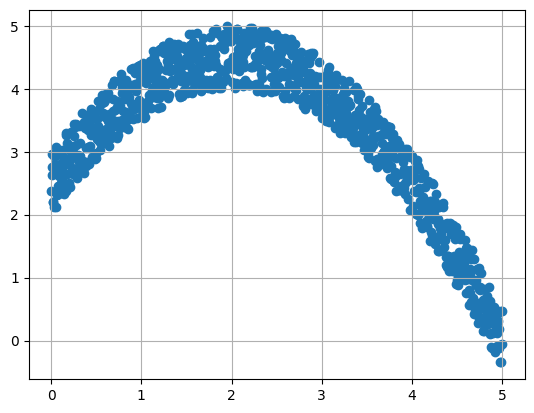

In [ ]:
#Let's generate some data with noise
np.random.seed(42)
x=np.linspace(0,5,1000)
noise=1
y=2*x-0.5*x**2+2+noise*np.random.rand(len(x)) #noisy data
plt.scatter(x,y)
plt.grid()

In [ ]:
def plotpred(x,y,y_pred,model):
  plt.scatter(x,y)
  plt.scatter(x,y_pred)
  plt.grid()
  plt.title(mean_squared_error(y,y_pred))

Play around with hyperparameters to see what happens!

In [ ]:
#Simple model did better on the test set!!! So, we need to care about test set!
X = x.reshape(-1,1) #no need to pass in x^2 now
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply StandardScaler for scaling
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nn=MLPRegressor(hidden_layer_sizes=(200,200),random_state=1, max_iter=2000, tol=0.001,early_stopping=True, validation_fraction=0.1,verbose=True) #Play around with this to see what happens!
nn.fit(X_train_scaled,y_train)
y_pred=nn.predict(X_test_scaled)

Iteration 1, loss = 5.52939075
Validation score: -3.537283
Iteration 2, loss = 3.95405182
Validation score: -2.302595
Iteration 3, loss = 2.82893289
Validation score: -1.443127
Iteration 4, loss = 2.03108117
Validation score: -0.815494
Iteration 5, loss = 1.46322012
Validation score: -0.399340
Iteration 6, loss = 1.13834823
Validation score: -0.169393
Iteration 7, loss = 1.01607293
Validation score: -0.052589
Iteration 8, loss = 0.95558872
Validation score: 0.055873
Iteration 9, loss = 0.87270075
Validation score: 0.196007
Iteration 10, loss = 0.76110611
Validation score: 0.327030
Iteration 11, loss = 0.65554146
Validation score: 0.422285
Iteration 12, loss = 0.57248947
Validation score: 0.492607
Iteration 13, loss = 0.50681068
Validation score: 0.548843
Iteration 14, loss = 0.44423951
Validation score: 0.604317
Iteration 15, loss = 0.38197860
Validation score: 0.657752
Iteration 16, loss = 0.32361990
Validation score: 0.709036
Iteration 17, loss = 0.27419324
Validation score: 0.758614

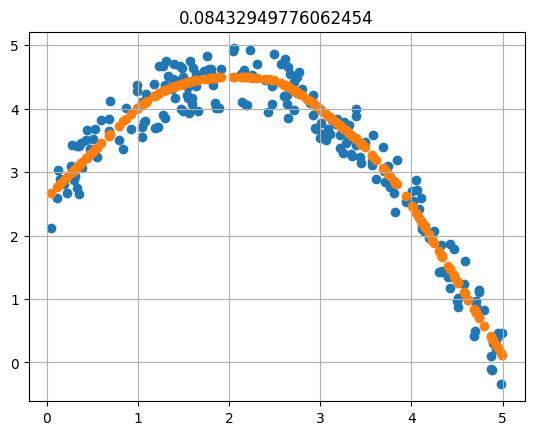

In [ ]:
plotpred(X_test[:,0],y_test,y_pred,nn) #x^2 is more important for prediction than X!

Grid Search! But it may take a while and infeasible for large models!

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example data
X = x.reshape(-1, 1)  # Reshaped input data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler for scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the base model
nn = MLPRegressor(random_state=1, max_iter=2000, tol=0.001, early_stopping=True, validation_fraction=0.1)

# Define the search grid
param_grid = {
    'hidden_layer_sizes': [(10,), (20, 20), (50, 50), (100, 50, 10)],  # Vary the size and number of layers
    'activation': ['relu', 'tanh', 'logistic'],  # Activation functions to test
}

# Perform grid search
grid_search = GridSearchCV(estimator=nn, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Display the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best negative MSE score: ", grid_search.best_score_)

# Use the best model to make predictions
best_nn = grid_search.best_estimator_
y_pred = best_nn.predict(X_test_scaled)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found:  {'activation': 'relu', 'hidden_layer_sizes': (100, 50, 10)}
Best negative MSE score:  -0.1093986683903904


###Actual Data
Let's try actual datasets

In [ ]:
def plot_pred_vs_actual(y, y_pred):
    # Calculate Mean Squared Error
    mse = mean_squared_error(y, y_pred)
    # Create the plot
    plt.figure(figsize=(6, 6))  # Square plot
    plt.scatter(y, y_pred, alpha=0.7, edgecolor='k', label='Predicted vs Actual')
    plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='Perfect Fit Line')  # 45-degree line
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Predicted vs Actual (MSE: {mse:.4f})')
    plt.grid(True)
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')  # Ensure square aspect ratio
    plt.show()

In [ ]:
data=sns.load_dataset('mpg')
data.head()
data=data.dropna()
y=data['mpg']
X=data.iloc[:,1:7]
X

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82
394,4,97.0,52.0,2130,24.6,82
395,4,135.0,84.0,2295,11.6,82
396,4,120.0,79.0,2625,18.6,82


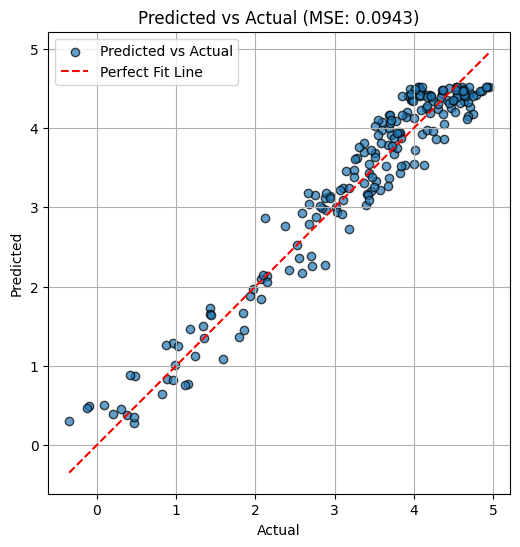

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply StandardScaler for scaling
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = MLPRegressor(hidden_layer_sizes=(200,200,200),random_state=1, max_iter=2000, tol=0.01,verbose=True) #Requires a lot of trial and error!
model=model.fit(X_train_scaled, y_train)
y_pred=model.predict(X_test_scaled)
plot_pred_vs_actual(y_test, y_pred)

##MNIST

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
mnist = pd.read_csv('/content/sample_data/mnist_train_small.csv')
mnist

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


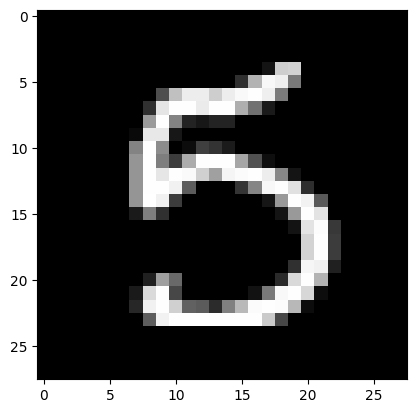

In [ ]:
index=3
pixels=mnist.iloc[index,1:].values.reshape(28, 28)
plt.imshow(pixels, cmap='gray')

In [ ]:
labels = mnist.iloc[:, 0]  # Extract the labels
pixels = mnist.iloc[:, 1:]  # Extract the pixel data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.2, random_state=42)
#No need to scale since everything is between 0 and 1

In [ ]:
from sklearn.neural_network import MLPClassifier
# Create a neuralnetwork model
neural_class = MLPClassifier(hidden_layer_sizes=(200,200,200),random_state=1, max_iter=2000, tol=0.01,verbose=True) #so much more complicated than simpler methods! Requires a lot of trial and error

# Fit the model to the training data
neural_class.fit(X_train, y_train) #notice how much longer this takes!

# Make predictions on the test data
y_pred = neural_class.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.94
Confusion Matrix:
[[368   0   0   1   1   0   5   1   0   1]
 [  0 425   4   2   3   1   0   0   1   0]
 [  3   0 360   5   4   0   5   8   5   0]
 [  2   2   6 379   0   8   1   1   4   3]
 [  0   2   1   0 387   1   4   0   0   6]
 [  2   1   1   4   0 327   4   0   1   1]
 [  7   0   1   0   0   2 401   0   1   0]
 [  1   2   5   2   6   1   0 414   1   6]
 [  7   4   8  16   2   6   6   3 328   4]
 [  2   1   0   6  18   3   1  11   8 365]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       377
           1       0.97      0.97      0.97       436
           2       0.93      0.92      0.93       390
           3       0.91      0.93      0.92       406
           4       0.92      0.97      0.94       401
           5       0.94      0.96      0.95       341
           6       0.94      0.97      0.96       412
           7       0.95      0.95      0.95       438
           8       0.94   

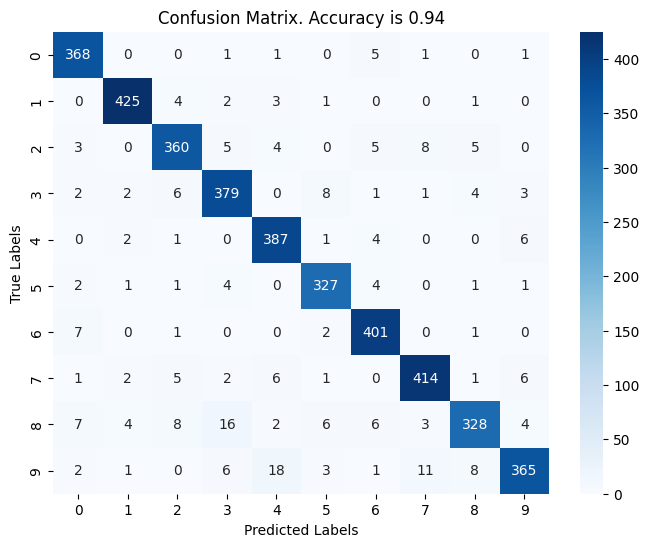

In [ ]:
# Define the labels for the classes
class_labels = np.arange(10)  # Adjust based on your column name for class labels

# Plot the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title(f"Confusion Matrix. Accuracy is {accuracy:.2f}")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([4])

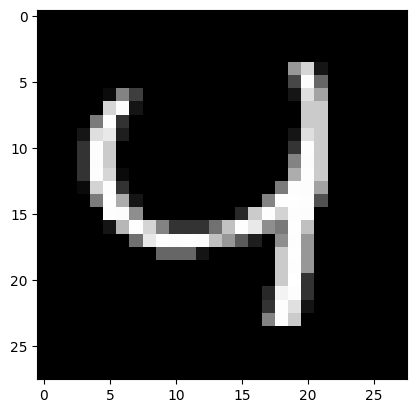

In [ ]:
index=20

pixels=mnist.iloc[index,1:].values.reshape(28, 28)
plt.imshow(pixels, cmap='gray')

prediction = neural_class.predict(mnist.iloc[index,1:].values.reshape(1,-1))
display(prediction)